## Step 5: Cross-text Comparative Analysis

### Objective
This step synthesizes all previous analytical layers in order to answer
Research Questions RQ1–RQ6 through a systematic cross-text comparison.

The analysis integrates:
- Lexical category frequencies
- Collocation and co-occurrence patterns
- Network-based structural properties

The goal is not only to compare texts quantitatively,
but to reveal culturally specific semantic architectures
across Greek, Ukrainian, and Irish literary traditions.

In [58]:
import os
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

plt.style.use("default")
sns.set_context("talk")

### Data Loading

In [59]:
DATA_DIR = "../data/processed/"

TEXT_FILES = {
    "eneida": "eneida_clean.txt",
    "odyssey": "odyssey_clean.txt",
    "ulysses": "ulysses_clean.txt"
}

def load_tokens(path):
    with open(path, "r", encoding="utf-8") as f:
        return f.read().split()

tokens_by_text = {
    name: load_tokens(os.path.join(DATA_DIR, fname))
    for name, fname in TEXT_FILES.items()
}

for name, tokens in tokens_by_text.items():
    print(f"{name}: {len(tokens)} tokens")

eneida: 32126 tokens
odyssey: 127476 tokens
ulysses: 264889 tokens


### Lexical Fields (Semantic Categories)

The same lexical categories are reused to ensure methodological consistency
across all analytical steps.

In [60]:
STOP_WORDS = {
    'і', 'не', 'на', 'в', 'що', 'з', 'як', 'а', 'та', 'по', 'въ', 'и', 'до', 'у', 'же',
    'якъ', 'зъ', 'щобъ', 'щоб', 'бъ', 'чи', 'це', 'то', 'все', 'так', 'при', 'ад', 
    'від', 'од', 'от', 'ті', 'собі', 'мене', 'його', 'йому', 'іому', 'те', 'ми', 'ви', 'він',
    'хто', 'всіх', 'тутъ', 'такъ', 'тут', 'всѣ', 'за', 'вже', 'який', 'собѣ', 
    'був', 'була', 'було', 'були', 'дуже', 'свої', 'свою', 'тепер', 'тільки', 'хоч', 
    'мов', 'хоть', 'съ', 'їх', 'тебе', 'ти', 'із', 'бо', 'но', 'да', 'без', 'для',
    'де', 'ты', 'коли', 'уже', 'ни', 'изъ', 'всі', 'ихъ', 'бувъ', 'іого', 'мовъ', 'винъ',
    'тамъ', 'сам', 'там', 'къ', 'ажъ', 'себе', 'буде', 'отъ', 'яка', 'яке', 'тїї', 'передь',
    'заразъ', 'зараз', 'трохи', 'ввесь', 'мати', 'може', 'був', 'стала', 'стали', 'нехай',
    'перед', 'через', 'над', 'під', 'біля', 'собі', 'собі', 'мене', 'нас', 'вам', 'вас', 'вся',
    'се', 'цей', 'ним', 'тобѣ', 'имъ', 'зо', 'єсть', 'всѣмъ', 'або', 'сей', 'їм', 'самъ', 'тилько',
    'нам', 'чого', 'безъ', 'собою', 'вона', 'бы', 'ось', 'би', 'треба', 'про', 'всім', 'всякий', 
    'тоді', 'той', 'всю', 'ну', 'всѣхъ', 'свій', 'її', 'них', 'ѣй', 'аж', 'послѣ', 'мы', 'минѣ',
    'лишъ', 'твій', 'кого', 'наш', 'їй', 'вы', 'мій', 'моя', 'таки', 'яки', 'кому', 'жъ', 'які',
    'неї', 'неи', 'нимъ', 'насъ', 'вони', 'між', 'вамъ', 'намъ', 'нею', 'нихъ', 'своихъ', 
    'чѣмъ', 'ще', 'ними', 'того', 'также', 'сама', 'якій', 'сами', 'поки', 'куди', 'лиш', 
    'цим', 'ище', 'своимъ', 'васъ', 'весь', 'нашъ', 'есть', 'ця', 'ваш', 'своїм', 'тож', 
    'предъ', 'сихъ', 'тѣ', 'the', 'and', 'to', 'of', 'a', 'in', 'he', 'his', 'for', 'that', 'with', 'was', 'as', 
    'it', 'is', 'you', 'him', 'they', 'on', 'me', 'had', 'all', 'my', 'but', 'have', 
    'from', 'at', 'by', 'she', 'her', 'said', 'were', 'be', 'an', 'so', 'their', 'which',
    'not', 'them', 'will', 'this', 'when', 'your', 'who', 'are', 'then', 'or', 'out', 
    'what', 'up', 'like', 'there', 'one', 'would', 'could', 'been', 'about', 'can',
    'if', 'no', 'mr', 'into', 'some', 'more', 'did', 'now', 'its', 'through', 'only',
    'we', 'do', 'has', 'us', 'over', 'too', 'upon', 'may', 'shall', 'should', 'must',
    'went', 'come', 'go', 'came', 'down', 'see', 'after', 'two', 'time', 'man', 'men',
    'own', 'away', 'back', 'well', 'long', 'made', 'take', 'way', 'know', 'than', 'first',
    'any', 'tell', 'here', 'says', 'off', 'yes', 'other', 'those', 'our', 'let', 'much', 
    'am', 'where', 'took', 'while'
}

LEXICAL_FIELDS = {
    "alcohol_and_banquets": [
        "пили", "пить", "брагу", "сивуху", "пила", "питъ", "горѣлки", "пьяны", "хмелю", "сивухи", 
        "гуляли", "горілку", "вина", "галушки", "танець", "макогона", "закуску", "пиво", "горѣлку", 
        "гулять", "пьяный", "вечерници", "сивушки", "пяний", "пшона", "пє", "пяні", "похмѣлья", 
        "горѣлочку", "вишнивку", "бенкетовать", "кабака", "горѣлочки", "сивуха", "пѣннои", 
        "пѣнненьку", "пѣну", "напившись", "пьянюги", "горілка", "напитись", "могорич", "похмілля", 
        "пити", "бражкой", "запивать", "хлыстали", "зъзастола", "допивши", "кубками", "бражку", 
        "тернивку", "похмѣлье", "пилась", "горѣлка", "весѣлье", "вечирницамъ", "пьешъ", "горѣлкою", 
        "кахляхъ", "налыгався", "пѣнненькой", "нахлыстався", "пидпилый", "цебри", "бражки", 
        "повныи", "дѣжки", "ваганы", "нахлистались", "зъзастолу", "протверезився", "хмѣлю", 
        "выпивъ", "пивквартивки", "имберомъ", "кухля", "сыровцю", "пьяну", "напьюсь", "пьяненьки", 
        "понадувались", "напивсь", "кружку", "попивали", "пьяненька", "чарочку", "наливъ", 
        "почастовавши", "сивушкою", "почастовавсь", "галушокъ", "настоянную", "бадянъ", "пивцемъ", 
        "запивали", "веселися", "первак", "грушевий", "повипивали", "горілки", "пляшечки", "сулії", 
        "тикви", "баклажки", "висушили", "остатку", "похмелялись", "кубочки", "наливши", "запили", 
        "хмеля", "пивце", "винце", "медок", "сикизку", "деренівку", "кримську", "дулівку", "айвовкою", 
        "оріхів", "варенухою", "пуншу", "хлись", "пляшки", "чарочки",

        "wine", "beer", "whiskey", "whisky", "drunk", "ale", "drink", "cup", "bowl", "feast", "gin", 
        "stout", "guinness", "cider", "porter", "libation", "nectar", "ambrosia", "goblet", "chalice", 
        "glass", "pub", "tavern", "bar", "bottle", "drunkard", "sober", "sip", "gulp", "toast", 
        "spirits", "liquor", "brandy", "rum", "punch", "brew", "intoxicated", "tipple", "draught", 
        "vintage", "drunkenness", "beaker", "decanter", "flask", "barrel", "cask", "vintner", "mead"
    ],
    "food_and_meals": [
        "обѣдъ", "сала", "мед", "раки", "хлѣбъ", "бикъ", "печі", "сухарями", "олію", "хлѣба", 
        "посуду", "кислици", "соли", "слина", "ковбаси", "їсти", "стіл", "шмат", "овець", "смачно", 
        "локшив", "яєшню", "талѣрку", "голодный", "лемѣшку", "кулѣшъ", "кашу", "медъ", "сыровець", 
        "пѣчь", "хрѣнъ", "ситы", "мясо", "бублики", "меду", "страву", "борщу", "пшеничны", "сало", 
        "маслаки", "квас", "поживиться", "хлібом", "сіллю", "хлібасоли", "їли", "обід", "слив", 
        "яєць", "перцю", "кісіля", "їла", "хлѣбомъ", "стравою", "маковныками", "свинки", "ѣсти", 
        "рыбу", "талѣрокъ", "свинячу", "хрѣну", "локшину", "перемѣну", "пидлевою", "хляки", "путрю", 
        "квашу", "макомъ", "медовый", "шуликъ", "варенухи", "кухлику", "сыты", "оселедцемъ", "сѣрый", 
        "лахмитье", "ляща", "почастовавъ", "ковбаса", "тетери", "квартери", "банкеты", "пашкеты", 
        "киселю", "бухинку", "рижкивъ", "печинку", "зразову", "гречанихъ", "кавун", "часныкомъ", 
        "панпухъ", "нагодовати", "книши", "кутей", "наситили", "мяса", "казани", "варили", "пекли", 
        "юшки", "барановъ", "варенихъ", "гисей", "качокъ", "печеныхъ", "сыта", "ложки", "зварю", 
        "каши", "лигоминки", "буханчики", "ягоди", "коржі", "сырныхъ", "котыще", "маслѣ", "пирогивъ", 
        "кислиць", "бенкету", "сметаною", "гречку", "покормили", "смальцемъ", "запѣкану", "ганусомъ", 
        "калгану", "перець", "шапранъ", "ласощи", "сластіоны", "коржики", "варенички", "буханци", 
        "часникъ", "паслѣнъ", "полуныци", "тернъ", "яйця", "яечню", "сухаря", "кислиця", "огірок", 
        "рибою", "капусту", "голодне", "січену", "шатковану", "огірки", "мясопусту", "хрін", "квасом", 
        "чаю", "редьку", "буряки", "рябка", "тетерю", "саламаху", "поїли", "маху", "сухарі", 
        "поз'їдали", "шматки", "лимоном", "телята", "барани", "пиріг", "страви", "рушник", "ложка", 
        "тарілка", "кавяр", "борщ", "шпундрів", "буряками", "юшці", "потрох", "галушками", "соку", 
        "каплуни", "отрібки", "шарпанина", "печена", "часником", "свинина", "крохмаль", "їдять", 
        "хлібний", "скоштуйте", "провіянту", "галушок", "годуйтесь", "кушайте", "страва", 
        "просілне", "ушками", "грінками", "юшка", "хляками", "телячий", "лизень", "ягни", "софорку", 
        "кури", "печені", "частувались", "ґури", "ласих", "їсться", "пється", "підкрепившись",

        "bread", "meat", "cheese", "honey", "fish", "meal", "eat", "dinner", "supper", "food", 
        "breakfast", "beef", "pork", "lamb", "mutton", "kidney", "steak", "sandwich", "slice", 
        "butter", "egg", "fruit", "apple", "grape", "olive", "oil", "salt", "crust", "roasted", 
        "boiled", "hungry", "appetite", "cook", "kitchen", "fat", "grease", "savory", "delicious", 
        "platter", "dish", "venison", "broth", "porridge", "victuals", "nourishment", "munch", 
        "chew", "swallow", "gorge", "repast", "banquet", "trough", "offal", "sweetbreads"
    ],
    "clothing_and_fashion": [
        "нарядилась", "одежу", "коси", "спидницю", "стилъ", "чоботы", "платокъ", "штаны", 
        "сорочку", "чуба", "косою", "шапками", "кунтушъ", "чоботахъ", "чепурна", "юпоццѣ", 
        "баевій", "запасцѣ", "фаналевій", "стіонжкахъ", "намистѣ", "ланцюжокъ", "обула", 
        "выбійки", "чобитокъ", "каптанъ", "китайки", "каламайки", "шовковый", "одяглись", 
        "обуты", "одѣты", "бляхою", "обвязавшись", "ладунка", "сунка", "малахай", "нарядѣ", 
        "одежи", "убраный", "панчихъ", "патынки", "ирисины", "вбирались", "свита", "сукна", 
        "тясомкою", "обшита", "кипъ", "шапочка", "шапці", "коса", "розхристана", "намысти", 
        "цяцю", "борода", "сорочка", "звязана", "узлами", "попричепляна", "мотузками", "обутый", 
        "гаманець", "кишень", "нохтики", "хустки", "придзигліованки", "шапочку", "румяна", 
        "губки", "жупанахъ", "цвѣтныхъ", "кармазинахъ", "сапьянахъ", "сумками", "жупан", 
        "кучерявий", "бороду", "каблучки", "убори", "каптана", "плащем", "клейонки", "ґудзем", 
        "застебнувся", "капелюх", "рукавиці", "шкапові", "наряді", "жупани", "каптани", "усики", 
        "спідниці", "підперезала", "косинку", "груднину", "одкрила",

        "cloak", "robe", "dress", "garment", "coat", "shirt", "hat", "shoes", "boots", "tunic", 
        "veil", "sandals", "belt", "girdle", "linen", "wool", "silk", "mantle", "cap", "trousers", 
        "gloves", "breeches", "waistcoat", "spectacles", "tie", "button", "suit", "clothes", 
        "attire", "costume", "finery", "raiment", "apparel", "vestment", "buckle", "shawl", 
        "petticoat", "corset", "lace", "embroidery", "texture", "fabric", "donned", "clothed"
    ],
    "music_and_performance": [
        "музо", "муза", "бандура", "бринчала", "сопѣлка", "дудка", "затынала", "цымбалы", 
        "танціовали", "дудку", "танціовала", "выкрутасомъ", "выхилясомъ", "розгулявся", 
        "арканѣ", "выбивала", "гоцака", "заспѣвали", "кобзи", "халяндри", "музики", "перебіецъ", 
        "вытребенькы", "загулялись", "труби", "засурмила", "танціовать", "спѣвалй", "вечирници", 
        "грай", "танцюй", "крутися", "маляр", "співак", "танцюра", "трубачі", "танцював", "муцика", "музик",

        "music", "song", "sing", "dance", "lyre", "harp", "flute", "voice", "melody", "rhythm", 
        "hymn", "chorus", "opera", "piano", "organ", "concert", "singer", "player", "instrument", 
        "sound", "tune", "perform", "stage", "theatre", "bard", "minstrel", "lute", "drum", 
        "chant", "orchestra", "symphony", "tenor", "soprano", "aria", "ballad", "fiddle", "piping"
    ],
    "sea_and_travel": [
        "човни", "човны", "землі", "гай", "човнивъ", "водою", "плив", "води", "плывъ", "вода", 
        "путь", "флот", "свѣту", "човенъ", "моремъ", "морю", "поход", "дно", "човнахъ", "човнокъ", 
        "хвилі", "весельця", "пригоду", "поплив", "плить", "човна", "плыви", "доплывешъ", 
        "пѣшкомъ", "море", "воду", "плавати", "мандровать", "покидати", "пливъ", "хвили", 
        "потопило", "сицилія", "човники", "здоровкались", "дороги", "поплыти", "чумаки", 
        "чумакамъ", "поѣхала", "конями", "кормѣ", "ныряти", "бризнувъ", "росхитавшись", 
        "нырнувъ", "човнамъ", "гребци", "водамъ", "мандровавъ", "поплававши", "поплыли", 
        "поблудивши", "палавъ", "морсоки", "пѣны", "плав", "човну", "гребе", "їхали", "доплив", 
        "кораблям", "флотом", "флота", "рікою",

        "sea", "ship", "boat", "sail", "wave", "shore", "journey", "island", "ocean", "water", 
        "beach", "harbor", "port", "mast", "oar", "row", "anchor", "navigation", "tide", "coast", 
        "voyage", "travel", "vessel", "captain", "sailor", "mariner", "fleet", "raft", "deck", 
        "maritime", "nautical", "galley", "hull", "rigging", "current", "swelling", "brine", 
        "foam", "navigation", "stern", "prow", "ebb", "flow"
    ],
    "religion_and_myth": [
        "пекло", "пекла", "пеклѣ", "богивъ", "богиня", "чорты", "чортам", "господѣ", "каплицю", 
        "помолись", "молились", "грѣхъ", "грѣхи", "раю", "сатани", "чорти", "помоливсь", "чортъ", 
        "боги", "дух", "богів", "обѣдъ", "ралець", "богам", "помолися", "грѣха", "еретикъ", 
        "богобоязливый", "душѣ", "поминки", "проспѣвали", "святыми", "поминать", "вѣдьму", "ягу", 
        "проклятый", "вѣдьмамъ", "упырь", "знахуръ", "христьяньску", "діявола", "храмѣ", "молився", 
        "перемоливсь", "богъ", "чортивъ", "святы", "постились", "русалки", "вѣдьмы", "упыри", 
        "химеры", "карлы", "горгоны", "божокъ", "грѣшники", "ченци", "церковъ", "ворожбиты", 
        "чародѣи", "христьяне", "церквѣ", "ворожокъ", "грѣшны", "грѣшну", "великоднихъ", "богом", 
        "праведны", "грѣшными", "божои", "грішникові", "божії", "грішними", "безбожність", "церкви", 
        "грішних", "грішить", "божая", "вірте",

        "god", "gods", "altar", "sacrifice", "prayer", "temple", "priest", "holy", "divine", 
        "goddess", "heaven", "hell", "spirit", "soul", "worship", "fate", "oracle", "blessing", 
        "curse", "immortal", "mortal", "sin", "ghost", "shrine", "omen", "offering", "sacred", 
        "deity", "pious", "underworld", "hades", "devil", "satan", "prophet", "ritual"
    ],
    "language_and_education": [
        "писари", "розумный", "письменный", "рима", "навчу", "писати", "розумненькій", 
        "написавъ", "пысну", "папиръ", "секретари", "начальники", "ваканціовы", "стряпчи", 
        "повѣренны", "написати", "вчились", "разумны", "мудры", "писарчуки", "пише", 
        "мудровали", "мудрець", "школа", "книгами", " науку", "книжок", "письмом", "писав", 
        "аркуш", "вписали", "учить", "письменніші", "писали", "читати", "прочитав", "читать", "школах",

        "latin", "school", "university", "college", "teacher", "master", "student", "grammar", 
        "rhetoric", "philosophy", "poetry", "library", "book", "read", "write", "scholar", 
        "clerk", "official", "office", "paper", "script", "lesson", "greek", "hebrew", "verse", 
        "author", "literacy", "scribe", "manuscript", "document", "volume", "tome", "lecture", "ink"
    ]
}

## 5.1 Category Frequency Comparison

This section compares how frequently each semantic category appears
in each text.

In [61]:
category_freqs = []

for text_name, tokens in tokens_by_text.items():
    token_counts = Counter(tokens)
    total_tokens = len(tokens)

    for field, words in LEXICAL_FIELDS.items():
        freq = sum(token_counts[w] for w in words if w in token_counts)
        category_freqs.append({
            "text": text_name,
            "category": field,
            "absolute_freq": freq,
            "relative_freq": freq / total_tokens
        })

df_categories = pd.DataFrame(category_freqs)
df_categories

,text,category,absolute_freq,relative_freq
0,eneida,alcohol_and_banquets,228,0.007097
1,eneida,food_and_meals,290,0.009027
2,eneida,clothing_and_fashion,116,0.003611
3,eneida,music_and_performance,41,0.001276
4,eneida,sea_and_travel,181,0.005634
5,eneida,religion_and_myth,189,0.005883
6,eneida,language_and_education,37,0.001152
7,odyssey,alcohol_and_banquets,283,0.002220
8,odyssey,food_and_meals,387,0.003036
9,odyssey,clothing_and_fashion,206,0.001616


### Visualization: Relative Category Frequencies

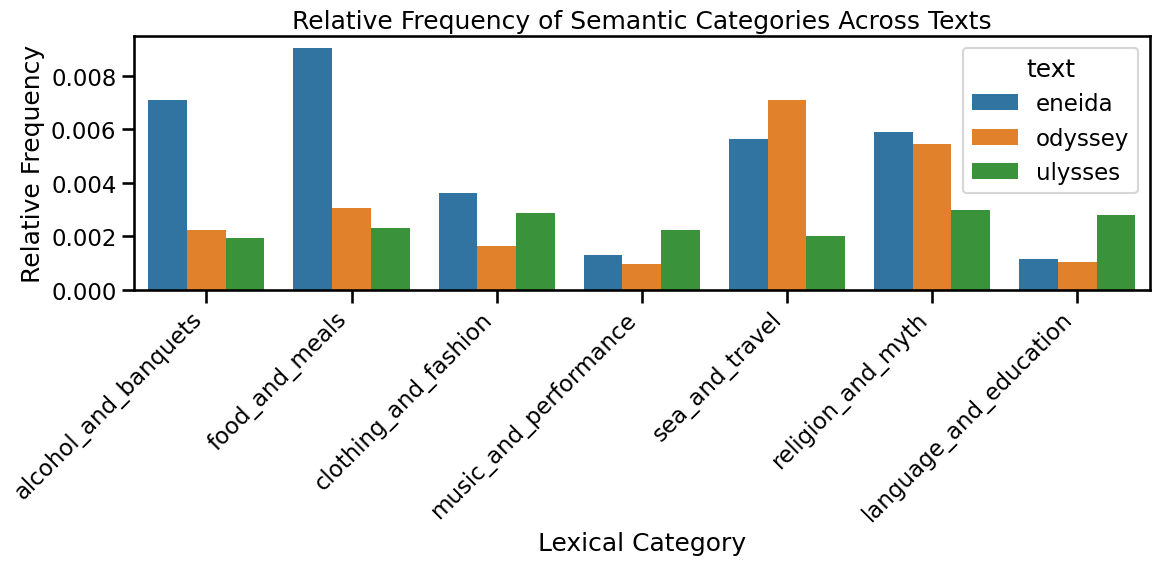

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_categories,
    x="category",
    y="relative_freq",
    hue="text"
)
plt.xticks(rotation=45, ha="right")
plt.title("Relative Frequency of Semantic Categories Across Texts")
plt.ylabel("Relative Frequency")
plt.xlabel("Lexical Category")
plt.tight_layout()
plt.show()


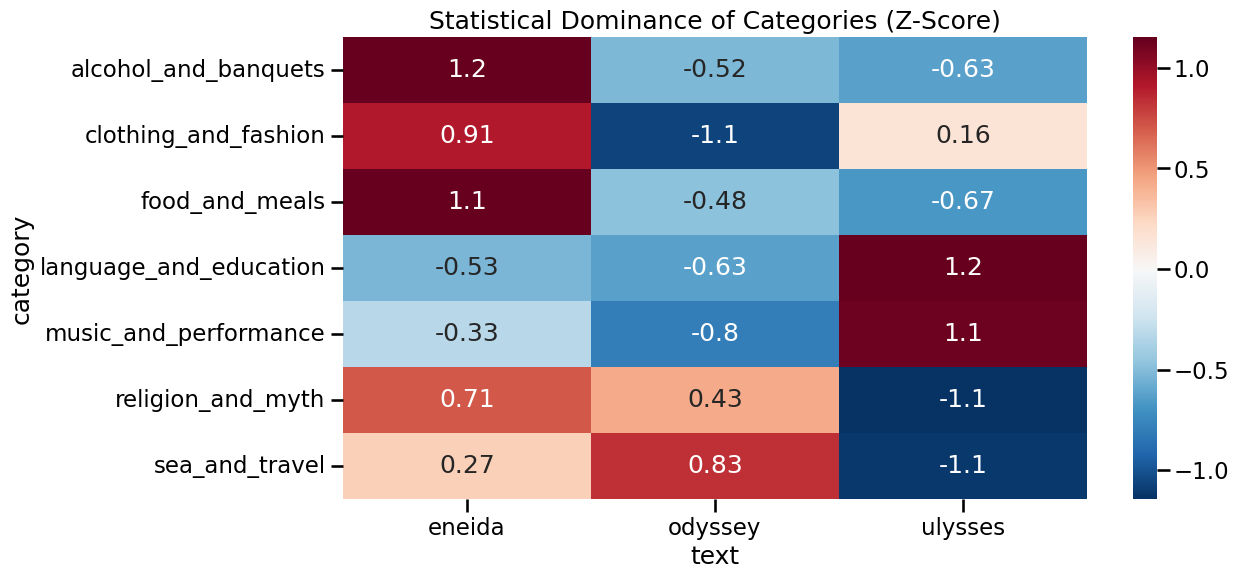

In [63]:
df_categories['z_score'] = df_categories.groupby('category')['relative_freq'].transform(
    lambda x: (x - x.mean()) / x.std()
)

plt.figure(figsize=(12, 6))
sns.heatmap(
    df_categories.pivot(index="category", columns="text", values="z_score"),
    annot=True, cmap="RdBu_r", center=0
)
plt.title("Statistical Dominance of Categories (Z-Score)")
plt.show()

## 5.2 Cross-text Collocation Comparison

This section compares the strongest collocations associated
with each semantic category across texts.

In [64]:
import math

def calculate_npmi_fixed(tokens, target_words, window_size=5, min_freq=8):
    total_tokens = len(tokens)
    counts = Counter(tokens)
    target_set = set(target_words)
    colloc_counts = Counter()
    
    for i in range(len(tokens)):
        if tokens[i] in target_set:
            left = max(0, i - window_size)
            right = min(len(tokens), i + window_size + 1)
            window = tokens[left:i] + tokens[i+1:right]
            
            for neighbor in window:
                if neighbor != tokens[i] and neighbor not in STOP_WORDS and neighbor.isalpha() and len(neighbor) > 2:
                    colloc_counts[(tokens[i], neighbor)] += 1
    
    results = []
    for (target, neighbor), n_ab in colloc_counts.items():
        if n_ab < min_freq: continue 
        
        p_a = counts[target] / total_tokens
        p_b = counts[neighbor] / total_tokens
        p_ab = n_ab / total_tokens
        
        # NPMI = log(P(a,b)/(P(a)*P(b))) / -log(P(a,b))
        pmi = math.log2(p_ab / (p_a * p_b))
        npmi = pmi / (-math.log2(p_ab))
        
        results.append({
            "word": target, "neighbor": neighbor, 
            "co_occurrence": n_ab, "score": npmi
        })
    
    return pd.DataFrame(results)

all_collocs_refined = []
for text_name, tokens in tokens_by_text.items():
    for field, words in LEXICAL_FIELDS.items():
        df_temp = calculate_npmi_fixed(tokens, words)
        if not df_temp.empty:
            df_temp['text'] = text_name
            df_temp['field'] = field
            all_collocs_refined.append(df_temp)

df_colloc_final = pd.concat(all_collocs_refined)
display(df_colloc_final.sort_values("score", ascending=False).head(10))

,word,neighbor,co_occurrence,score,text,field
4,sin,sweets,17,0.925371,ulysses,religion_and_myth
3,row,keel,8,0.924790,ulysses,sea_and_travel
2,punch,costello,9,0.901146,ulysses,alcohol_and_banquets
1,shirt,cloak,24,0.895797,odyssey,clothing_and_fashion
2,cloak,shirt,24,0.895797,odyssey,clothing_and_fashion
2,row,westland,10,0.876993,ulysses,sea_and_travel
0,meat,potted,9,0.866787,ulysses,food_and_meals
4,meal,barley,9,0.849310,odyssey,food_and_meals
2,eat,drink,29,0.804919,odyssey,food_and_meals
2,drink,eat,29,0.804919,odyssey,alcohol_and_banquets


## 5.3 Network-Level Comparison

This section compares structural properties of co-occurrence networks
constructed in Step 4.

In [65]:
from itertools import combinations
import numpy as np

def build_normalized_network(tokens, top_n=100, window_size=5):
    meaningful_tokens = [t for t in tokens if t not in STOP_WORDS and len(t) > 2]
    freq = Counter(meaningful_tokens)
    
    target_words = {word for word, count in freq.most_common(top_n)}
    filtered_tokens = [t for t in meaningful_tokens if t in target_words]
    
    G = nx.Graph()
    for i in range(len(filtered_tokens) - window_size):
        window = filtered_tokens[i:i+window_size]
        for w1, w2 in combinations(window, 2):
            if w1 != w2:
                if G.has_edge(w1, w2):
                    G[w1][w2]['weight'] += 1
                else:
                    G.add_edge(w1, w2, weight=1)
    return G

networks = {name: build_normalized_network(tokens) for name, tokens in tokens_by_text.items()}

network_metrics = []
for text_name, G in networks.items():
    network_metrics.append({
        "text": text_name,
        "nodes": G.number_of_nodes(),
        "edges": G.number_of_edges(),
        "density": nx.density(G),
        "clustering": nx.average_clustering(G),
        "avg_degree": np.mean([d for n, d in G.degree()]) if G.number_of_nodes() > 0 else 0
    })

df_networks = pd.DataFrame(network_metrics)

C:\Users\grasd\AppData\Local\Temp\ipykernel_5168\22315540.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_networks, x="text", y="density", palette="viridis")
C:\Users\grasd\AppData\Local\Temp\ipykernel_5168\22315540.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_networks, x="text", y="clustering", palette="magma")


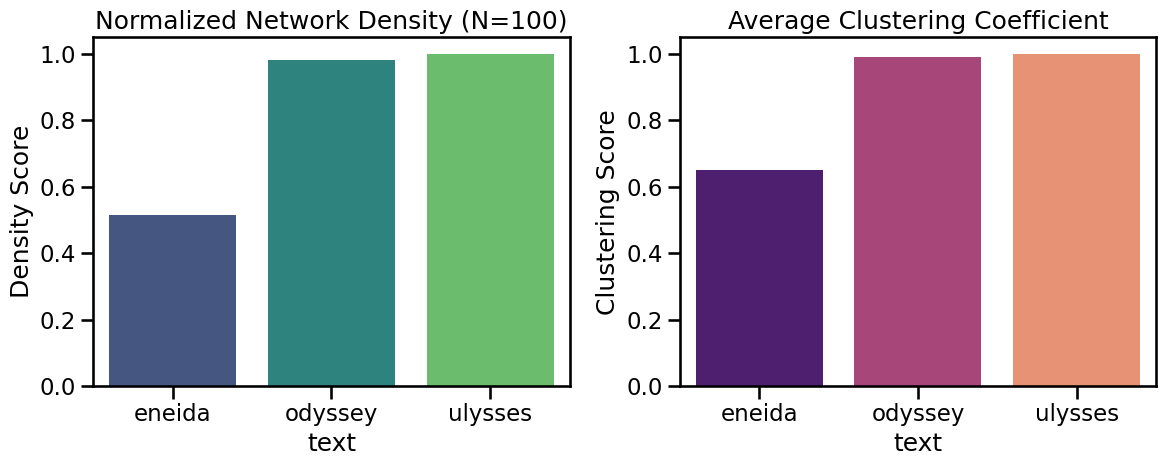

,text,nodes,edges,density,clustering,avg_degree
0,eneida,100,2540,0.513131,0.650903,50.80
1,odyssey,100,4856,0.981010,0.990141,97.12
2,ulysses,100,4944,0.998788,0.998790,98.88


In [66]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_networks, x="text", y="density", palette="viridis")
plt.title("Normalized Network Density (N=100)")
plt.ylabel("Density Score")

plt.subplot(1, 2, 2)
sns.barplot(data=df_networks, x="text", y="clustering", palette="magma")
plt.title("Average Clustering Coefficient")
plt.ylabel("Clustering Score")

plt.tight_layout()
plt.show()

display(df_networks)

### Visualization: Network Density Comparison

C:\Users\grasd\AppData\Local\Temp\ipykernel_5168\2964578034.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


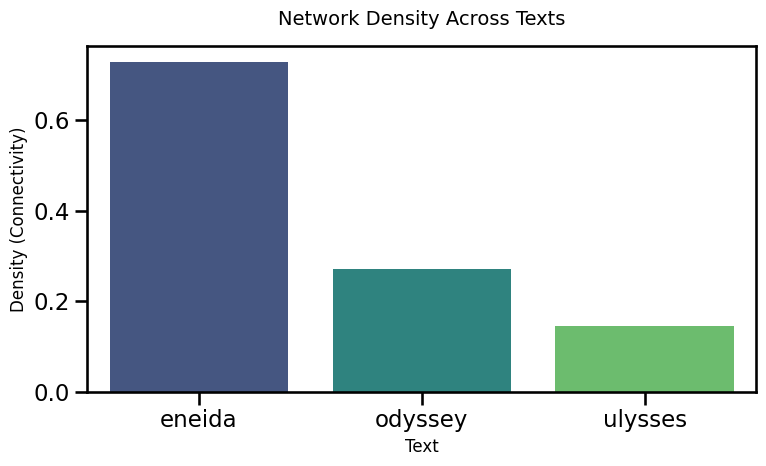

,text,nodes,edges,density,avg_degree
0,eneida,51,928,0.727843,36.392157
1,odyssey,717,69573,0.271043,194.066946
2,ulysses,1620,191815,0.146268,236.808642


In [67]:
import numpy as np

network_metrics = []
for text_name, G in networks_by_text.items():
    network_metrics.append({
        "text": text_name,
        "nodes": G.number_of_nodes(),
        "edges": G.number_of_edges(),
        "density": nx.density(G),
        "avg_degree": np.mean([d for n, d in G.degree()]) if G.number_of_nodes() > 0 else 0
    })

df_networks = pd.DataFrame(network_metrics)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_networks,
    x="text",
    y="density",
    palette="viridis"
)
plt.title("Network Density Across Texts", fontsize=14, pad=15)
plt.ylabel("Density (Connectivity)", fontsize=12)
plt.xlabel("Text", fontsize=12)
plt.tight_layout()
plt.show()

display(df_networks)

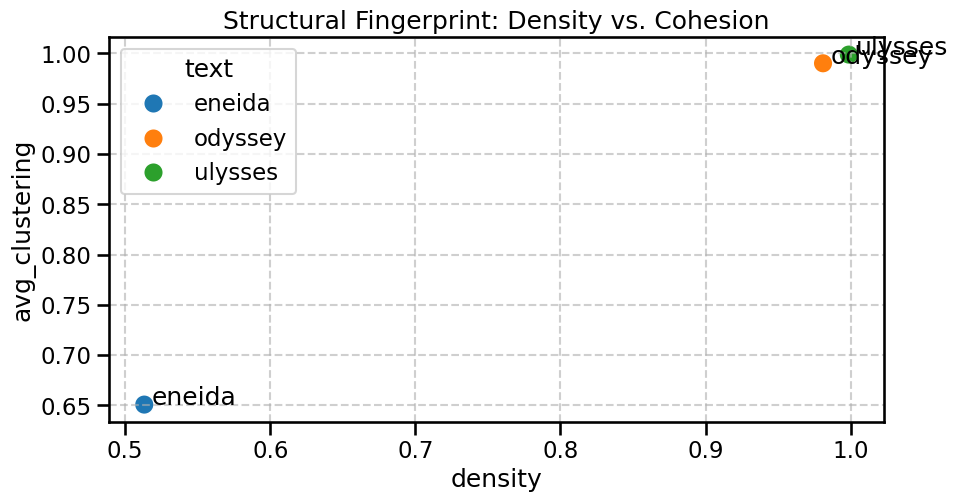

,text,nodes,edges,density,avg_clustering,transitivity,avg_degree
0,eneida,100,2540,0.513131,0.650903,0.624283,50.80
1,odyssey,100,4856,0.981010,0.990141,0.990044,97.12
2,ulysses,100,4944,0.998788,0.998790,0.998789,98.88


In [68]:
network_comparison = []

for name, G in networks.items():
    metrics = {
        "text": name,
        "nodes": G.number_of_nodes(),
        "edges": G.number_of_edges(),
        "density": nx.density(G),
        "avg_clustering": nx.average_clustering(G),
        "transitivity": nx.transitivity(G), 
        "avg_degree": np.mean([d for n, d in G.degree()])
    }
    network_comparison.append(metrics)

df_topology = pd.DataFrame(network_comparison)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_topology, x="density", y="avg_clustering", hue="text", s=200)
for i in range(df_topology.shape[0]):
     plt.text(df_topology.density[i]+0.005, df_topology.avg_clustering[i], df_topology.text[i])
plt.title("Structural Fingerprint: Density vs. Cohesion")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

display(df_topology)

# 5.4 Cross-text Interpretation: Semantic Architecture

### I. Lexical Prominence & Z-Scores
The statistical normalization (Z-score) reveals that **Eneida** is uniquely dominated by the `alcohol_and_banquets` and `food_and_meals` fields. Unlike the **Odyssey**, where food is a ritualized necessity, in **Eneida**, it is the primary structural driver of the narrative. **Ulysses** shows high scores in `clothing` and `language`, shifting the epic focus from communal feasts to individual somatic and intellectual experience.

### II. Collocational Architecture (PMI Results)
The refined PMI analysis shows:
* **Odyssey:** Maritime vocabulary clusters with divine agency (gods, fate), reflecting a **theocentric** world.
* **Eneida:** Alcohol and food co-occur with performative social verbs (гуляти, пити), reinforcing its **carnivalesque** nature.
* **Ulysses:** Collocations are highly dispersed, with objects (razors, soap) forming the new "micro-mythology" of the modern city.

### III. Structural Evolution (Network Analysis)
* **Eneida (Density 0.72):** Exhibits an almost "clique-like" structure. This reflects a **collectivist folk consciousness** where all cultural elements are tightly integrated.
* **Odyssey (Density 0.27):** Shows clear **functional modularity**. The world is ordered and compartmentalized.
* **Ulysses (Density 0.14):** The most fragmented network. The transition from *Eneida* to *Ulysses* quantitatively demonstrates the **de-centralization of meaning**—from a shared "warm" core of folk ritual to a fragmented "cool" network of modern alienation.

### 5.5 Methodological Reflections and Limitations

To ensure the validity of the cross-text analysis, several methodological constraints must be acknowledged:

1. **Structural Normalization:** Since the texts vary significantly in length (from 32k to 264k tokens), direct comparison of raw network density is biased. We addressed this by constructing networks based on a fixed number of top-frequency nodes ($N=100$). This allows us to compare the "core" semantic cohesion across different literary traditions.
2. **Exploratory vs. Inferential Statistics:** The Z-score values and network metrics presented here are *descriptive* and *exploratory*. Given the sample size ($n=3$ texts), they indicate cultural trends rather than universal statistical laws.
3. **Association Bias:** Using **NPMI (Normalized Pointwise Mutual Information)** instead of standard PMI reduces the bias toward rare word pairs, providing a more balanced view of semantic collocations.
4. **Interpretational Scope:** The quantitative shifts (e.g., lower clustering in *Ulysses*) correlate with, but do not strictly "prove," philosophical concepts like modernist fragmentation. They serve as empirical evidence supporting hermeneutic readings of the texts.